In [1]:
import json
import pandas as pd
import numpy as np
import shutil
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
#Read json file
with open('photo_json.json') as data_file:
    data=json.load(data_file)

In [3]:
#Convert to DataFrame
df=DataFrame(data['photojson'])

In [4]:
#Display last 10 entries
df.tail(10)

,caption,photo_id,business_id,label
199990,Scottsdale Restaurants,af30H63e0E_jmOBBXxqyQQ,04L9uKk6OixQ7ForUfPQLw,drink
199991,Asian fusion Scottsdale,Beg6NltQC2dj79SBtFmZeg,04L9uKk6OixQ7ForUfPQLw,food
199992,Cocktails in Scottsdale,dg1dta9889cJxToHLq7uHw,04L9uKk6OixQ7ForUfPQLw,drink
199993,,n4S8ynKVnGV1KpTgEe9glA,04L9uKk6OixQ7ForUfPQLw,inside
199994,,99KSGc5_YF7qnAwjxTty5A,04L9uKk6OixQ7ForUfPQLw,food
199995,,bOxjQteGjgfLC12j3XQ8ZQ,04L9uKk6OixQ7ForUfPQLw,inside
199996,,24vyLQopy8khaNPV4Jzq5Q,04L9uKk6OixQ7ForUfPQLw,inside
199997,ZUCCHINI TRUFFLE MAC Our famous cheese sauce w...,cfYWTTkg2ABYsC0XGFWXPQ,zEJnehBheo9BeT8_o9hvLQ,food
199998,,JCkfrwG54YMpjgEbZSx_WQ,04L9uKk6OixQ7ForUfPQLw,inside
199999,,Rnb8tt2YczYgnvkZ1dJfrA,04L9uKk6OixQ7ForUfPQLw,inside


In [5]:
df['photo_id'].nunique()

200000

In [6]:
df['business_id'].nunique()

30488

In [6]:
print(len(df['caption']==" "))
print(" ")

caption        0
photo_id       0
business_id    0
label          0
dtype: int64

In [6]:
#caption and nocaption
df_caption = df[df['caption']!=""]
df_nocaption = df[df['caption']==""]

In [7]:
#Caption list
captioned = df_caption['caption'].tolist()
nocaption = df_nocaption['caption'].tolist()

In [8]:
#Look over the captions
captioned

['Outside',
 '"last neighborhood bar in Vegas"',
 'now this is a sandwich',
 'Kai Restaurant',
 'Resort lounge.',
 'Not the Blueberry Hill I go to, but close enough.',
 "The counter at Matt's Big Breakfast. I have a strong hunch that's Matt himself in the background.",
 'A typical table at Coronado Cafe',
 'from their website',
 'From in front of the booth - you can see back into the kitchen',
 'front door',
 'chicken salad',
 'inside of the restaurant',
 '$10 for this.',
 'Good times...',
 'From my friend at Merz, the architecture/design firm that helped make this place awesome!',
 'From my friend at Merz, the architecture/design firm that helped make this place awesome!',
 'Bar Dancers',
 'See, I told you there were fishbowls.',
 'Large Pizza with Black Olives',
 'Ooo... look at the pretty bottles behind the bar!',
 'parasol down',
 "Eddie V's Edgewater Grill",
 'Best Ribs on the Planet.  OK, so I took the photo after we ate most of it.  Whatever.',
 'Club',
 'Yummy Scallop with Baby

In [9]:
#caption dataframe
Caption_df=df_caption['caption']

In [10]:
Caption_df

16                                                  Outside
18                         "last neighborhood bar in Vegas"
19                                   now this is a sandwich
20                                           Kai Restaurant
21                                           Resort lounge.
                                ...                        
199989                                             Takoyaki
199990                               Scottsdale Restaurants
199991                              Asian fusion Scottsdale
199992                              Cocktails in Scottsdale
199997    ZUCCHINI TRUFFLE MAC Our famous cheese sauce w...
Name: caption, Length: 92150, dtype: object

In [11]:
#Save caption to text
np.savetxt(r'E:\4th_sem_NOTES\DBMS\Project\DATASET\captiontext.txt', Caption_df.values, fmt='%s', delimiter='\t')

In [13]:
WorkingFolder='E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\'
base_filename = 'captiontext.txt'
with open(os.path.join(WorkingFolder, base_filename),'w') as outfile:
    Caption_df.to_string(outfile)

In [14]:
print("Data set has {} observations with caption.".format(len(captioned)))
print("Data set has {} observations without caption.".format(len(nocaption)))

Data set has 92150 observations with caption.
Data set has 107850 observations without caption.


In [15]:
#Seperating the captioned and uncaptioned images folder
'''
i=0
for photo_id in df.photo_id:
    try:
            if(pd.isnull(df.caption[i]) or df.caption[i] ==""):
                shutil.copy("E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\photos\\"+photo_id+".jpg", "E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\NoCaption")
            else:
                shutil.copy("E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\photos\\"+photo_id+".jpg", "E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\Caption")
    except:
                #print(i,"\n")
                pass

    i+=1
'''



'\ni=0\nfor photo_id in df.photo_id:\n    try:\n            if(pd.isnull(df.caption[i]) or df.caption[i] ==""):\n                shutil.copy("E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\photos\\"+photo_id+".jpg", "E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\NoCaption")\n            else:\n                shutil.copy("E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\photos\\"+photo_id+".jpg", "E:\\4th_sem_NOTES\\DBMS\\Project\\DATASET\\Caption")\n    except:\n                #print(i,"\n")\n                pass\n\n    i+=1\n'

In [16]:
#Split captioned images as train/test/valid sets
'''
#Creating Train / Val / Test folders (One time use)
root_dir = 'E:/4th_sem_NOTES/DBMS/Project/DATASET'


os.makedirs(root_dir +'/Ctrain' )
os.makedirs(root_dir +'/Cval' )
os.makedirs(root_dir +'/Ctest')


# Creating partitions of the data after shuffeling
currentCls = '/Caption'
src = "E:/4th_sem_NOTES/DBMS/Project/DATASET"+currentCls# Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, "E:/4th_sem_NOTES/DBMS/Project/DATASET/Ctrain")

for name in val_FileNames:
    shutil.copy(name, "E:/4th_sem_NOTES/DBMS/Project/DATASET/Cval")

for name in test_FileNames:
    shutil.copy(name, "E:/4th_sem_NOTES/DBMS/Project/DATASET/Ctest")

'''

'\n#Creating Train / Val / Test folders (One time use)\nroot_dir = \'E:/4th_sem_NOTES/DBMS/Project/DATASET\'\n\n\nos.makedirs(root_dir +\'/Ctrain\' )\nos.makedirs(root_dir +\'/Cval\' )\nos.makedirs(root_dir +\'/Ctest\')\n\n\n# Creating partitions of the data after shuffeling\ncurrentCls = \'/Caption\'\nsrc = "E:/4th_sem_NOTES/DBMS/Project/DATASET"+currentCls# Folder to copy images from\n\nallFileNames = os.listdir(src)\nnp.random.shuffle(allFileNames)\ntrain_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),\n                                                          [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])\n\n\ntrain_FileNames = [src+\'/\'+ name for name in train_FileNames.tolist()]\nval_FileNames = [src+\'/\' + name for name in val_FileNames.tolist()]\ntest_FileNames = [src+\'/\' + name for name in test_FileNames.tolist()]\n\nprint(\'Total images: \', len(allFileNames))\nprint(\'Training: \', len(train_FileNames))\nprint(\'Validation: \', len

In [17]:
categories=['drink','food','inside','menu','outside']

In [18]:
#Dataset distribution 
dist=df.groupby('label').count()[['photo_id']]
dist=dist.rename(columns={'photo_id': 'count'})
dist['percent']=dist/200000*100

In [19]:
dist

,count,percent
label,,
drink,18121,9.0605
food,114874,57.4370
inside,52448,26.2240
menu,3023,1.5115
outside,11534,5.7670


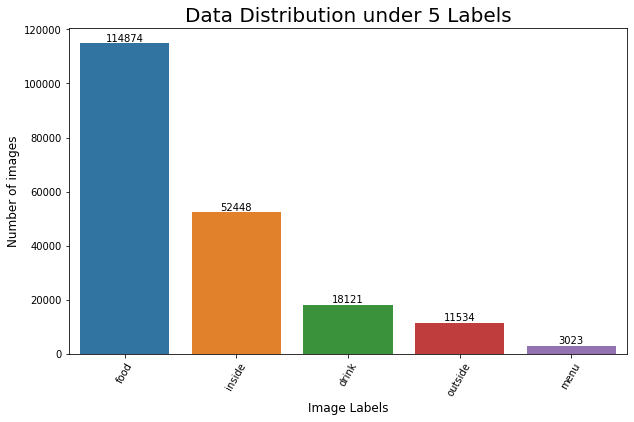

In [20]:
label_count = df.label.value_counts()
label_count = label_count.sort_values(ascending = False)
label_count = label_count.iloc[0:15]

# plot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(label_count.index, label_count.values)
plt.title("Data Distribution under 5 Labels",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 60)
plt.ylabel('Number of images', fontsize = 12)
plt.xlabel('Image Labels', fontsize = 12)

#text labels
r = ax.patches
labels = label_count.values
for rect, label in zip(r, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, ha='center', va='bottom')

In [21]:
'''
##other way for plot
df.groupby('label')['photo_id'].nunique().plot(kind='bar')
plt.title('Data Distribution')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()
'''

'\n##other way for plot\ndf.groupby(\'label\')[\'photo_id\'].nunique().plot(kind=\'bar\')\nplt.title(\'Data Distribution\')\nplt.xticks(rotation=0, horizontalalignment="center")\nplt.show()\n'

In [22]:
#only captioned distribution 
cap_dist=df_caption.groupby('label').count()[['photo_id']]
cap_dist=dist.rename(columns={'photo_id': 'count'})
cap_dist['percent']=cap_dist/92150*100

In [23]:
cap_dist

,count,percent
label,,
drink,18121,19.664677
food,114874,124.659794
inside,52448,56.915898
menu,3023,3.280521
outside,11534,12.516549


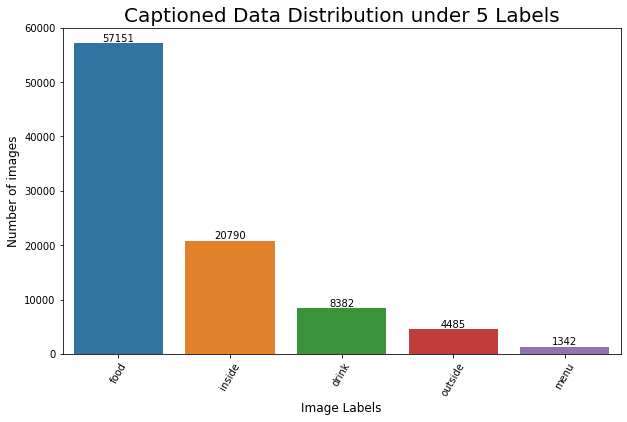

In [24]:
caplabel_count = df_caption.label.value_counts()
caplabel_count = caplabel_count.sort_values(ascending = False)
caplabel_count = caplabel_count.iloc[0:15]

# plot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(caplabel_count.index, caplabel_count.values)
plt.title("Captioned Data Distribution under 5 Labels",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 60)
plt.ylabel('Number of images', fontsize = 12)
plt.xlabel('Image Labels', fontsize = 12)

#text labels
r = ax.patches
labels = caplabel_count.values
for rect, label in zip(r, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, ha='center', va='bottom')

In [25]:
'''
#Other way for plot
df_caption.groupby('label')['photo_id'].nunique().plot(kind='bar')
plt.title('Captioned-Data Distribution')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()
'''

'\n#Other way for plot\ndf_caption.groupby(\'label\')[\'photo_id\'].nunique().plot(kind=\'bar\')\nplt.title(\'Captioned-Data Distribution\')\nplt.xticks(rotation=0, horizontalalignment="center")\nplt.show()\n'

In [26]:
#caption and nocaption
df['flag']= df['caption']!=""

In [27]:
df

,caption,photo_id,business_id,label,flag
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside,False
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside,False
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food,False
3,,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside,False
4,,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside,False
...,...,...,...,...,...
199995,,bOxjQteGjgfLC12j3XQ8ZQ,04L9uKk6OixQ7ForUfPQLw,inside,False
199996,,24vyLQopy8khaNPV4Jzq5Q,04L9uKk6OixQ7ForUfPQLw,inside,False
199997,ZUCCHINI TRUFFLE MAC Our famous cheese sauce w...,cfYWTTkg2ABYsC0XGFWXPQ,zEJnehBheo9BeT8_o9hvLQ,food,True
199998,,JCkfrwG54YMpjgEbZSx_WQ,04L9uKk6OixQ7ForUfPQLw,inside,False


In [28]:
df.loc[df['flag'] == False, 'flag'] = "Uncaptioned"
df.loc[df['flag'] == True, 'flag'] = "Captioned"

In [29]:
df

,caption,photo_id,business_id,label,flag
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside,Uncaptioned
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside,Uncaptioned
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food,Uncaptioned
3,,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside,Uncaptioned
4,,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside,Uncaptioned
...,...,...,...,...,...
199995,,bOxjQteGjgfLC12j3XQ8ZQ,04L9uKk6OixQ7ForUfPQLw,inside,Uncaptioned
199996,,24vyLQopy8khaNPV4Jzq5Q,04L9uKk6OixQ7ForUfPQLw,inside,Uncaptioned
199997,ZUCCHINI TRUFFLE MAC Our famous cheese sauce w...,cfYWTTkg2ABYsC0XGFWXPQ,zEJnehBheo9BeT8_o9hvLQ,food,Captioned
199998,,JCkfrwG54YMpjgEbZSx_WQ,04L9uKk6OixQ7ForUfPQLw,inside,Uncaptioned


C:\Users\BASAVARAJ\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


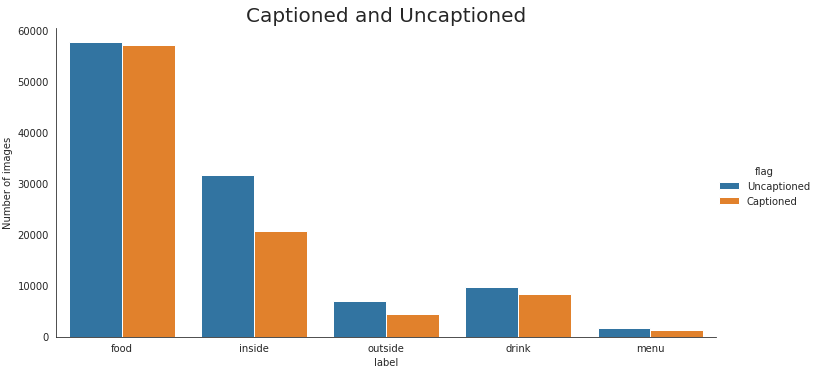

In [51]:
#Distribution of captioned and uncaptioned images
with sns.axes_style('white'):
    g = sns.factorplot("label", data=df, aspect=2.0, kind='count',
                       hue='flag', order=(['food','inside','outside','drink','menu']))
    plt.title("Captioned and Uncaptioned",fontsize = 20)
    g.set_ylabels('Number of images')

In [35]:
#plot images

def plot_images(plotdata):
    
    path='E:/4th_sem_NOTES/DBMS/Project/DATASET/Caption/'
    
    f = plt.figure(figsize=(12, 12))
    
    i=1
    for ind in foodd.index:
        #print(path+plotdata['photo_id'][ind]+'.jpg')
        plt.subplot(2, 2, i)
        plt.title(plotdata['caption'][ind])
        img1 = cv2.imread(path+plotdata['photo_id'][ind]+'.jpg')
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        plt.imshow(img1)
        i+=1
 
    plt.show()

In [36]:
food=df_caption.loc[df_caption['label']=='food']
foodd=food.sample(n = 4)
foodd.index=[0,1,2,3] 

In [37]:
foodd

,caption,photo_id,business_id,label
0,McDonald's Buttermilk Crispy Chicken Sandwich ...,u6P_wQc3lHjCbOWoxwYFow,CHW_DPKnTqudyRaDa4vwkg,food
1,Original Pollo Bowl,lsZ2iXCr3vjf6fXbWPx0jw,5j7BnXXvlS69uLVHrY9Upw,food
2,Cheese cake with strawberry sauce.,hLuduWwI2yYq4xiqbwfMxQ,VgfqjXetLMxn5X5_uomBkg,food
3,Croissant Sammie,dmqyQDvnUfnD0c6-9npGwg,i9D9xPBV0gR1Ja9kbY4NCw,food


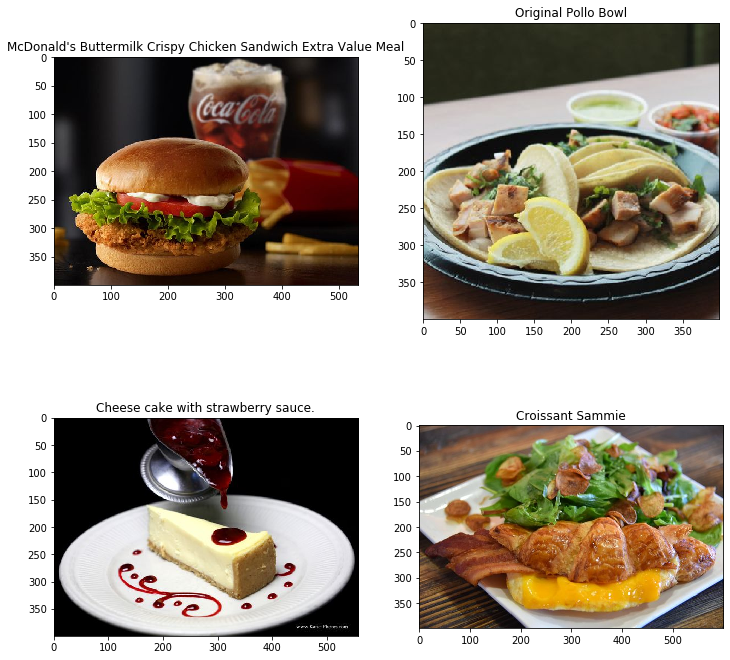

In [38]:
plot_images(foodd)

In [39]:
drink=df_caption.loc[df_caption['label']=='drink']
drinkd=drink.sample(n = 4)
drinkd.index=[0,1,2,3] 

In [40]:
drinkd

,caption,photo_id,business_id,label
0,soju,tyqSu3EGK-4kH3BjRW5ECg,4_L9bnIvY8TLDfiTBGcnRA,drink
1,Bar Lifestyle,MlH94nLayEWhLDo6ZSynMw,qNDqXNl38BYYn2JWcXw4OQ,drink
2,Coffee.,qG37sXHBayiLx4MDXQfrmQ,XBgrsZu2SLWXy5AqkayswQ,drink
3,"Choice of house, apple, mango, peach, prickly ...",flemijn_1j70_t0WajpYFg,V_RD57ea9ATcoryET1vTkA,drink


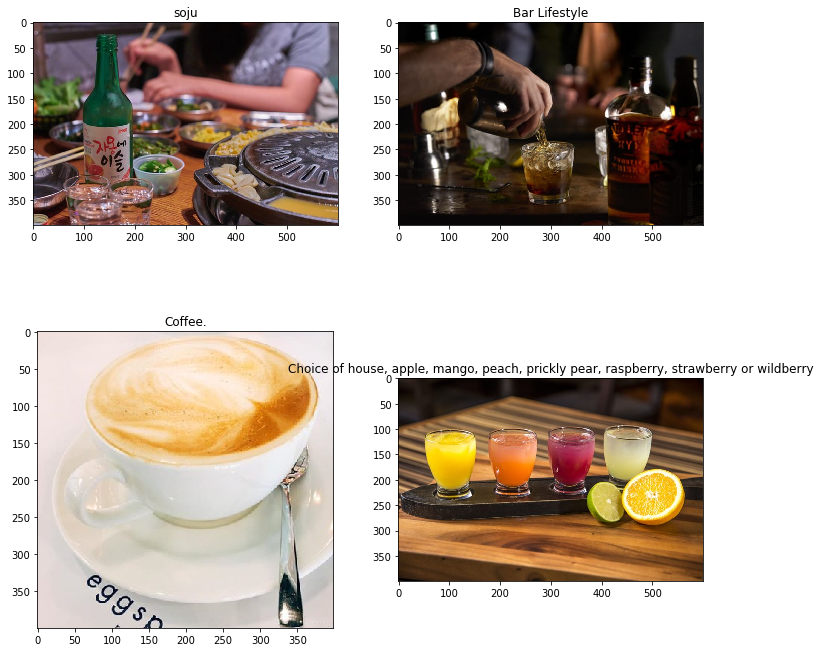

In [41]:
plot_images(drinkd)

In [42]:
inside=df_caption.loc[df_caption['label']=='inside']
insided=inside.sample(n = 4)
insided.index=[0,1,2,3] 

In [43]:
insided

,caption,photo_id,business_id,label
0,A quiet sat night,Jwdx49CqWKI4jw1XKQkw6w,364hhL5st0LV16UcBHRJ3A,inside
1,Trio of tables in a little nook,6sPLktmKv2Ms4Os4HuQJgw,-hXocgx4xqs9dv_l0jiZZg,inside
2,Interior,9eQpRsTERMxKj1jRbUr3DA,GqRQbFlgov853CIOEnrvsg,inside
3,All the beers on tap $4 EVERY Thursday!,68Vr3zXuv_nk9Ah7XGKPfQ,WnLhd38sH80ViWwzyF7yoA,inside


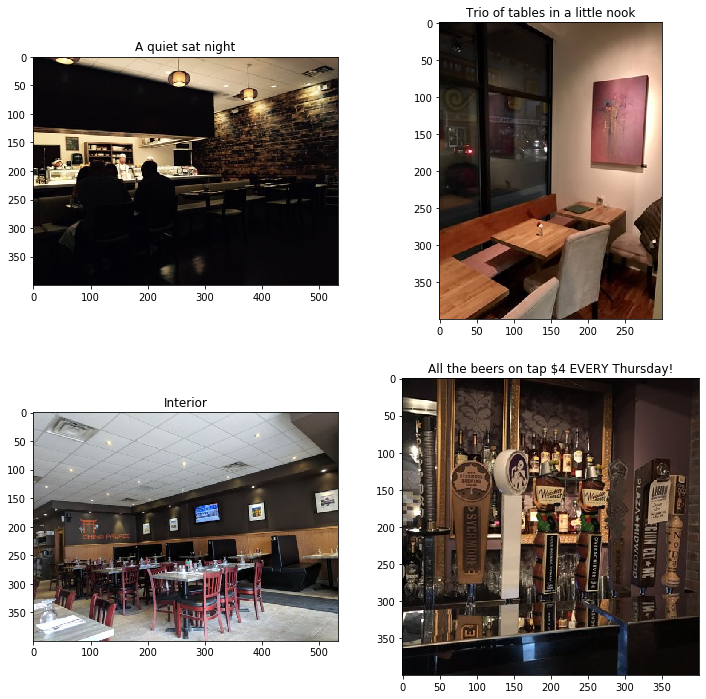

In [44]:
plot_images(insided)

In [45]:
menu=df_caption.loc[df_caption['label']=='menu']
menud=menu.sample(n = 4)
menud.index=[0,1,2,3] 

In [46]:
menud

,caption,photo_id,business_id,label
0,Tons of flavors to choose from,fY2V8t8BKmcWdrXCAr2raw,EWEHMED82jBNV38MrMVTmg,menu
1,Menu 3,HpmjTQFpKKKuMuOH1bWuog,w67o_AhcSU_fjVOTlbquXg,menu
2,Cuuuuute Table Settings,ak2doaptxHibK_CEQh2LiQ,IMLrj2klosTFvPRLv56cng,menu
3,Bei specials!,OnSodHZI8LrGvfqqzr6FLQ,yqYtY3-Po4OVPafA9Z-Xyw,menu


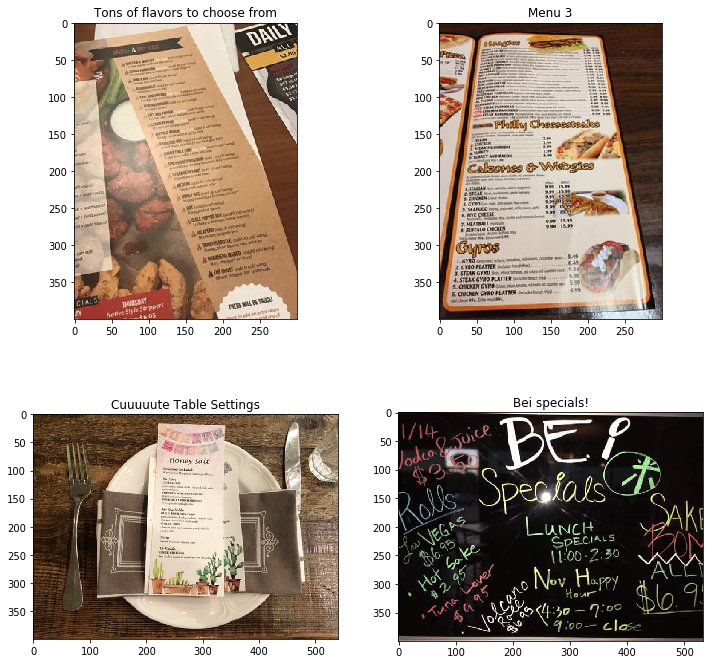

In [47]:
plot_images(menud)

In [48]:
outside=df_caption.loc[df_caption['label']=='outside']
outsided=outside.sample(n = 4)
outsided.index=[0,1,2,3] 

In [49]:
outsided

,caption,photo_id,business_id,label
0,The Wine Shop at Rivergate,1l8AMBHQ0RSfJLmSVcjWTA,lBf_TcBWS7XF-TA4qT8MgQ,outside
1,Brunch with my Cuzin!! IZZYDIAZ https://t.co/...,fj9-GspBl-6sHB9OLu3OOw,JtvdUCawl-oIKXU9G06Log,outside
2,Storefront is located in a stripmall off of Li...,KDghF6P3ibaxpJDEkQYXzQ,TG2QAcrevOmXDuCQQFlGew,outside
3,View of the Bellagio water show and our view f...,bmvX9sqxCvV9bKUk9ke6UA,4JNXUYY8wbaaDmk3BPzlWw,outside


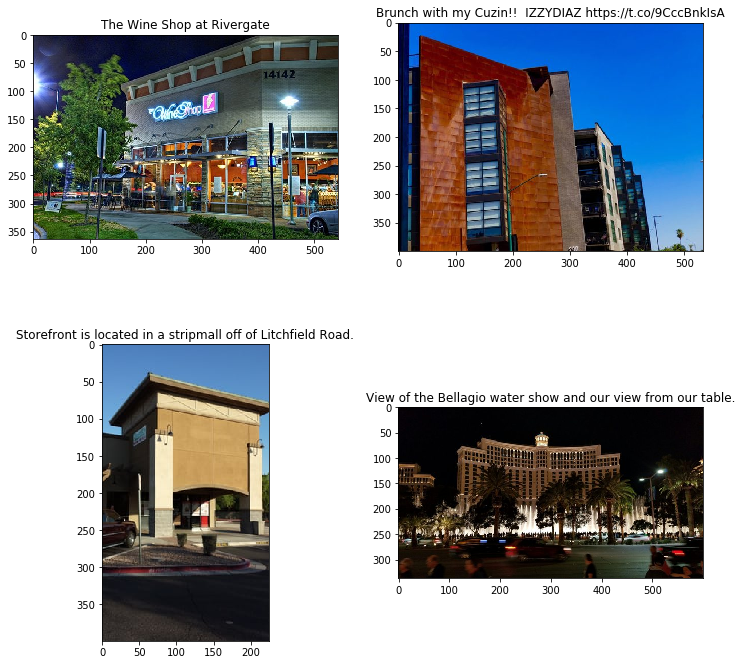

In [50]:
plot_images(outsided)